In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [35]:
college=pd.read_csv("College_Data")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [36]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [37]:
college.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [38]:
college.shape

(777, 19)

In [39]:
college.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [40]:
college.drop('Unnamed: 0',axis=1,inplace=True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [41]:
college['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
college['Private']=le.fit_transform(college['Private'])
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [61]:
college.skew()

Private       -1.021933
Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [59]:
from scipy import stats
z=np.abs(stats.zscore(college))
col_new=college[(z<3).all(axis=1)]
col_new

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,1,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52
10,1,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73


In [60]:
col_new.skew()

Private       -1.170882
Apps           2.082576
Accept         1.949842
Enroll         2.127762
Top10perc      1.064869
Top25perc      0.192606
F.Undergrad    2.186768
P.Undergrad    2.366620
Outstate       0.454554
Room.Board     0.438963
Books          0.455260
Personal       0.844558
PhD           -0.441975
Terminal      -0.600757
S.F.Ratio      0.343623
perc.alumni    0.468564
Expend         1.401691
Grad.Rate     -0.170713
dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
college_sc=sc.fit_transform(col_new)
college_sc

array([[ 0.57396402, -0.26515844, -0.24759506, ..., -0.89709526,
        -0.565513  , -0.30986218],
       [ 0.57396402, -0.36084715, -0.33251215, ...,  0.61191288,
        -0.06412805, -0.67791908],
       [ 0.57396402, -0.77783547, -0.80301571, ...,  1.19874938,
         2.97881096, -0.371205  ],
       ...,
       [ 0.57396402, -0.14183549,  0.1128308 , ...,  0.69574667,
         0.07024549,  1.10102262],
       [ 0.57396402, -0.0849172 ,  0.1820225 , ..., -0.22642497,
        -0.18607055, -0.98463317],
       [ 0.57396402,  0.2829894 ,  0.14428157, ...,  0.44424531,
        -1.31492664,  2.0825077 ]])

In [64]:
college_df=pd.DataFrame(college_sc,columns=col_new.columns)
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.573964,-0.265158,-0.247595,0.156446,-0.173081,-0.112370,0.000759,-0.131532,-0.741815,-0.945556,-0.660686,1.572271,-0.131678,-0.061421,1.152558,-0.897095,-0.565513,-0.309862
1,0.573964,-0.360847,-0.332512,-0.456832,-0.242845,-0.223276,-0.560865,-0.654392,0.249766,-0.520462,-1.075469,-0.200750,-1.278692,-0.929593,-0.343136,0.611913,-0.064128,-0.677919
2,0.573964,-0.777835,-0.803016,-0.773824,2.408194,1.939394,-0.720634,-0.697367,0.694806,1.085447,-0.660686,-0.697538,1.352693,1.313184,-1.838830,1.198749,2.978811,-0.371205
3,0.573964,-0.870225,-0.930706,-0.904444,-0.661430,-0.555994,-0.799912,0.264791,-0.710584,-0.170941,2.242799,0.373126,0.273150,-0.495507,-0.630769,-1.735433,0.583174,-3.070289
4,0.573964,-0.707719,-0.721244,-0.740373,0.873382,0.442161,-0.669605,-0.723629,0.835345,-0.912493,-0.245902,-1.040151,-0.334092,-0.423159,-1.349853,-0.980929,0.229481,-0.616576


In [65]:
X=college_df

In [66]:
from sklearn.cluster import KMeans
cluster_id=[]
K=list(range(1,10))
for i in K:
    km=KMeans(i).fit(X)
    y_km_sd_pred=km.fit_predict(X)
    cluster_id.append(km.inertia_)
cluster_id

[12276.000000000002,
 9517.710794317853,
 7453.662577939264,
 6789.3267027783795,
 6255.209651848485,
 5978.366583553421,
 5750.519067560522,
 5576.830387908806,
 5392.3679202113]

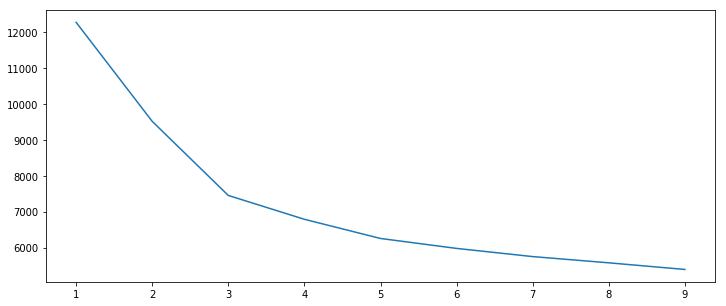

In [67]:
plt.figure(figsize=(12,5))
plt.plot(K,cluster_id)
plt.show()

In [44]:
#col1=college[(college["P.Undergrad"]>(np.mean(college["P.Undergrad"])-3*np.std(college["P.Undergrad"])))
             & (college["P.Undergrad"]<(np.mean(college["P.Undergrad"])+2*np.std(college["P.Undergrad"])))]

In [45]:
#col1.skew()

Private       -1.169486
Apps           4.206049
Accept         3.684177
Enroll         2.831939
Top10perc      1.388992
Top25perc      0.258061
F.Undergrad    2.895801
P.Undergrad    1.879201
Outstate       0.478832
Room.Board     0.459393
Books          3.552296
Personal       1.807812
PhD           -0.733247
Terminal      -0.777051
S.F.Ratio      0.701031
perc.alumni    0.577804
Expend         3.457203
Grad.Rate     -0.134054
dtype: float64

In [46]:
col2=col1[(col1["Apps"]>(np.mean(col1["Apps"])-3*np.std(col1["Apps"])))
             & (col1["Apps"]<(np.mean(col1["Apps"])+2.5*np.std(col1["Apps"])))]
col2.skew()

Private       -1.270693
Apps           1.727792
Accept         1.892571
Enroll         2.418213
Top10perc      1.345818
Top25perc      0.248889
F.Undergrad    2.719645
P.Undergrad    1.956941
Outstate       0.472725
Room.Board     0.454280
Books          3.598825
Personal       1.857428
PhD           -0.711122
Terminal      -0.748688
S.F.Ratio      0.748470
perc.alumni    0.555394
Expend         3.760213
Grad.Rate     -0.123364
dtype: float64

In [47]:
col3=col2[(col2["Books"]>(np.mean(col2["Books"])-3*np.std(col2["Books"])))
             & (col2["Books"]<(np.mean(col2["Books"])+2.5*np.std(col2["Books"])))]
col3.skew()

Private       -1.245263
Apps           1.744580
Accept         1.901105
Enroll         2.405602
Top10perc      1.367793
Top25perc      0.254120
F.Undergrad    2.700256
P.Undergrad    1.957886
Outstate       0.471083
Room.Board     0.467860
Books          0.124728
Personal       1.725731
PhD           -0.598389
Terminal      -0.742832
S.F.Ratio      0.757809
perc.alumni    0.547968
Expend         3.805462
Grad.Rate     -0.140007
dtype: float64

In [48]:
col4=col3[(col3["Expend"]>(np.mean(col3["Expend"])-3*np.std(col3["Expend"])))
             & (col3["Expend"]<(np.mean(col3["Expend"])+2.4*np.std(col3["Expend"])))]
col4.skew()

Private       -1.209777
Apps           1.851059
Accept         1.979948
Enroll         2.450725
Top10perc      1.228955
Top25perc      0.220723
F.Undergrad    2.707305
P.Undergrad    1.946990
Outstate       0.468495
Room.Board     0.489321
Books          0.127151
Personal       1.727401
PhD           -0.608610
Terminal      -0.737332
S.F.Ratio      0.972333
perc.alumni    0.554242
Expend         1.218957
Grad.Rate     -0.144162
dtype: float64

In [49]:
col5=col4[(col4["F.Undergrad"]>(np.mean(col4["F.Undergrad"])-3*np.std(col4["F.Undergrad"])))
             & (col4["F.Undergrad"]<(np.mean(col4["F.Undergrad"])+2*np.std(col4["F.Undergrad"])))]
col5.skew()

Private       -1.515693
Apps           1.962911
Accept         1.760540
Enroll         2.064436
Top10perc      1.237892
Top25perc      0.246078
F.Undergrad    1.875150
P.Undergrad    2.172103
Outstate       0.412393
Room.Board     0.432130
Books          0.184487
Personal       1.971123
PhD           -0.537227
Terminal      -0.671339
S.F.Ratio      1.093421
perc.alumni    0.501241
Expend         1.205354
Grad.Rate     -0.185812
dtype: float64

In [50]:
col6=col5[(col5["Enroll"]>(np.mean(col5["Enroll"])-3*np.std(col5["Enroll"])))
             & (col5["Enroll"]<(np.mean(col5["Enroll"])+2*np.std(col5["Enroll"])))]
col6.skew()

Private       -1.839438
Apps           1.865481
Accept         1.401177
Enroll         1.167895
Top10perc      1.129722
Top25perc      0.219901
F.Undergrad    1.830861
P.Undergrad    2.387611
Outstate       0.391483
Room.Board     0.438587
Books          0.307569
Personal       2.130071
PhD           -0.512296
Terminal      -0.637923
S.F.Ratio      1.274077
perc.alumni    0.457261
Expend         1.190588
Grad.Rate     -0.197423
dtype: float64

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [53]:
college_sc=sc.fit_transform(col6)
college_sc

array([[ 0.43965201,  0.0386994 ,  0.10934731, ..., -0.96500772,
        -0.60622719, -0.35159263],
       [ 0.43965201,  0.42059321,  0.93131242, ..., -0.64056778,
         0.45433862, -0.5910001 ],
       [ 0.43965201, -0.12974045, -0.05100715, ...,  0.494972  ,
        -0.09085183, -0.71070383],
       ...,
       [ 0.43965201,  0.25578352,  0.78996293, ...,  0.57608199,
         0.04727119,  1.02500034],
       [ 0.43965201,  0.35597619,  0.92062212, ..., -0.31612784,
        -0.21619696, -1.00996317],
       [ 0.43965201,  1.00359839,  0.84935347, ...,  0.33275204,
        -1.37655209,  1.98263022]])

In [55]:
college_df=pd.DataFrame(college_sc,columns=col6.columns)
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.439652,0.038699,0.109347,1.156295,-0.180732,-0.088729,0.819145,0.128795,-0.835540,-1.003716,-0.662570,1.584615,-0.018989,0.033648,1.189861,-0.965008,-0.606227,-0.351593
1,0.439652,0.420593,0.931312,0.373862,-0.644329,-1.305154,0.669964,1.321620,0.432884,1.997554,2.028994,0.437290,-2.578928,-3.180619,-0.461207,-0.640568,0.454339,-0.591000
2,0.439652,-0.129740,-0.051007,-0.285028,-0.246960,-0.194506,-0.546379,-0.628390,0.162951,-0.574963,-1.111163,-0.111788,-1.080427,-0.769919,-0.265318,0.494972,-0.090852,-0.710704
3,0.439652,-0.863761,-0.939490,-1.030024,2.269710,1.868127,-0.934841,-0.690624,0.611092,1.044769,-0.662570,-0.587108,1.354637,1.305962,-1.720497,1.062742,3.036996,-0.411444
4,0.439652,-1.026392,-1.180615,-1.337007,-0.644329,-0.511834,-1.127595,0.702734,-0.804091,-0.222433,2.477588,0.437290,0.355636,-0.368135,-0.545160,-1.776108,0.574512,-3.044927


In [56]:
X=college_df

In [57]:
from sklearn.cluster import KMeans
cluster_id=[]
K=list(range(1,10))
for i in K:
    km=KMeans(i).fit(X)
    y_km_sd_pred=km.fit_predict(X)
    cluster_id.append(km.inertia_)
cluster_id

[10890.0,
 8591.847996286382,
 6984.158347968406,
 6430.040479579124,
 6022.437500119699,
 5711.423001121153,
 5518.143574426712,
 5331.761789902601,
 5182.387068653112]

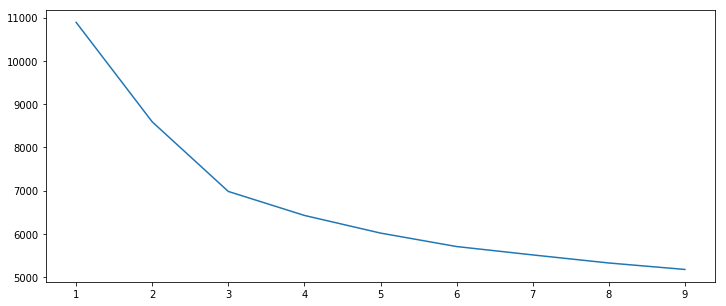

In [58]:
plt.figure(figsize=(12,5))
plt.plot(K,cluster_id)
plt.show()